# <font color="#1b5776">1. <u>Adding Imports</u></font>

Installing an amazing library: Calplot: to visualize data via Calendar.

In [ ]:
!pip install calplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calplot
import seaborn as sns
from datetime import datetime as dte
import pickle

# <font color="#1b5776">2. <u>Getting the Data</u></font>

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AAIC - Assignments/SNo.23_Self Case Study 1/Output_Files/train_cleaned3.csv",dtype={"fullVisitorId":"string"})

test = pd.read_csv("/content/drive/MyDrive/AAIC - Assignments/SNo.23_Self Case Study 1/Output_Files/test_cleaned3.csv",dtype={"fullVisitorId":"string"})

In [ ]:
train.head(2)

,fullVisitorId,channelGrouping,date,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.adNetworkType,value
0,3162355547410993243,Organic Search,20171016,1,1508198450,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,OTHERS,OTHERS,OTHERS,OTHERS,1,1.0,1.0,0.0,0.0,0.0,OTHERS,google,organic,water bottle,OTHERS,OTHERS,0.0,OTHERS,EMEA
1,8934116514970143966,Referral,20171016,6,1508176307,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,OTHERS,2,2.0,2.0,28.0,0.0,0.0,OTHERS,sites.google.com,referral,OTHERS,/a/google.com/transportation/mtv-services/bike...,OTHERS,0.0,OTHERS,North America


In [ ]:
test.head(2)

,fullVisitorId,channelGrouping,date,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.adNetworkType,value
0,7460955084541987166,Organic Search,20180511,2,1526099341,Chrome,Android,True,mobile,Asia,Southern Asia,India,Delhi,OTHERS,OTHERS,OTHERS,4,3.0,1,973.0,0.0,0.0,OTHERS,google,organic,OTHERS,OTHERS,OTHERS,0.0,OTHERS,APAC
1,460252456180441002,Direct,20180511,166,1526064483,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Francisco,OTHERS,4,3.0,1,49.0,0.0,0.0,OTHERS,(direct),OTHERS,OTHERS,OTHERS,OTHERS,0.0,OTHERS,North America


In [ ]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (1708337, 31)
test shape: (401589, 31)


<b>The date column:-</b><br>
The given dates in <b>date</b> column are present in YYYYMMDD format.
Refer [this](https://support.google.com/analytics/answer/3437719?hl=en#:~:text=The%20date%20of%20the%20session%20in%20YYYYMMDD%20format.).
We need to convert its data type from Object to datetime.<br>
Also, let's ignore the <b>visitStartTime</b> feature for now, since it is actually the timestamp of the vsit in POSIX format ([Source](https://support.google.com/analytics/answer/3437719?hl=en#:~:text=visitStartTime,as%20POSIX%20time)). We'll use this feature for feature engineering later on.

In [ ]:
train['date'] = pd.to_datetime(arg=train['date'], format="%Y%m%d")
test['date'] = pd.to_datetime(arg=test['date'], format="%Y%m%d")

In [ ]:
# printing the data types of each column:-
print(dict(train.dtypes))

{'fullVisitorId': StringDtype, 'channelGrouping': dtype('O'), 'date': dtype('<M8[ns]'), 'visitNumber': dtype('int64'), 'visitStartTime': dtype('int64'), 'device_browser': dtype('O'), 'device_operatingSystem': dtype('O'), 'device_isMobile': dtype('bool'), 'device_deviceCategory': dtype('O'), 'geoNetwork_continent': dtype('O'), 'geoNetwork_subContinent': dtype('O'), 'geoNetwork_country': dtype('O'), 'geoNetwork_region': dtype('O'), 'geoNetwork_metro': dtype('O'), 'geoNetwork_city': dtype('O'), 'geoNetwork_networkDomain': dtype('O'), 'totals_hits': dtype('int64'), 'totals_pageviews': dtype('float64'), 'totals_sessionQualityDim': dtype('float64'), 'totals_timeOnSite': dtype('float64'), 'totals_transactions': dtype('float64'), 'totals_transactionRevenue': dtype('float64'), 'trafficSource_campaign': dtype('O'), 'trafficSource_source': dtype('O'), 'trafficSource_medium': dtype('O'), 'trafficSource_keyword': dtype('O'), 'trafficSource_referralPath': dtype('O'), 'trafficSource_adContent': dtype

We have data (<b>31</b> features) on <b>1708337</b> visits to GStore in <b>train</b> file (from <b>1 Aug,2016 to 30 April,2018</b>) and on <b>401589</b> visits to GStore in <b>test</b> file (from <b>1 May,2018 to 15 Oct,2018</b>).

# <font color="#1b5776">3. <u>EDA & Feature Engineering</u></font><br>
Let's take EDA & Feature Engineering hand-in-hand 👬


[Plotting directly from a pandas dataframe/series](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) is easy!

<b><h3>Below plots display visits of customers and revenue generated every day from 1 Aug,2016 to 15 Oct,2018.</h3></b>

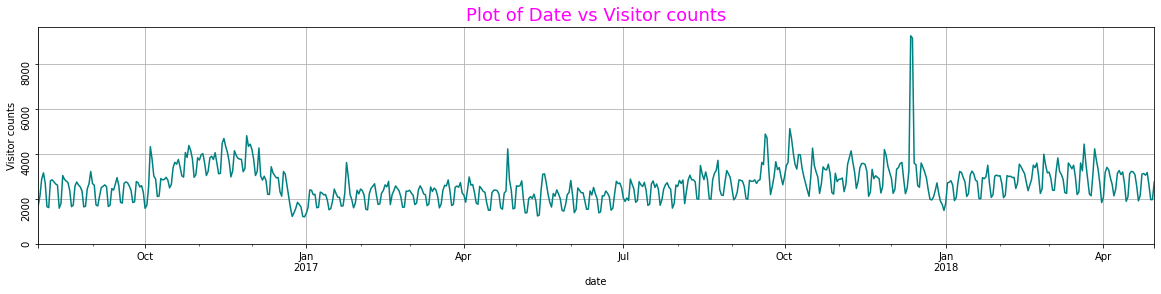

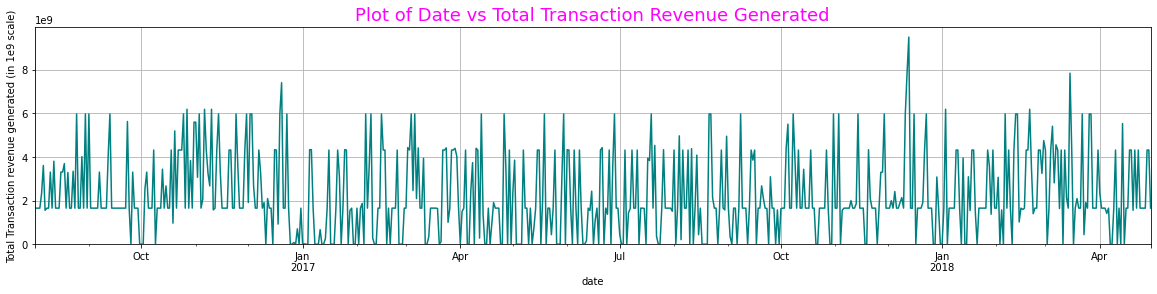

In [ ]:
df = train.groupby(by="date")["fullVisitorId"].count()

plt.title(label="Plot of Date vs Visitor counts",fontsize=18,color="magenta")
plt.yticks(rotation=90)
df.plot(ylabel="Visitor counts",figsize=(20,4),ylim=(0),grid=True,color="teal")
plt.show()

df = train.groupby(by="date")["totals_transactionRevenue"].sum()
plt.title(label="Plot of Date vs Total Transaction Revenue Generated",fontsize=18,color="magenta")
df.plot(ylabel="Total Transaction revenue generated (in 1e9 scale)",figsize=(20,4),ylim=(0),grid=True,color="teal")
plt.show()

Observations:-
* There's no specific trend throughout the years but a slight seasonality of increasing visitors around the year end.
* More people started visiting the site around Oct-Dec (mostly because of festive season at this time of year).
* Total revenue generation has spiked every year in December and reached almost 9 billion and remained at around 6 billion at other times of the year when revenue generation spiked.
* In the months of Oct-Jan, revenue as well as visits haven't touched 0 at all.

<b><h3>Below plot is an amazing visualization of log of revenue generated every day. (Log has been taken since it reduces the scale and hence makes it easier to visualize, compared to watching large numbers in range of millions).</h3></b>
Credits:-<br>
(https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/) <br>
(https://calplot.readthedocs.io/en/latest/)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 1296x648 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bf65a0a10>,
       dtype=object))

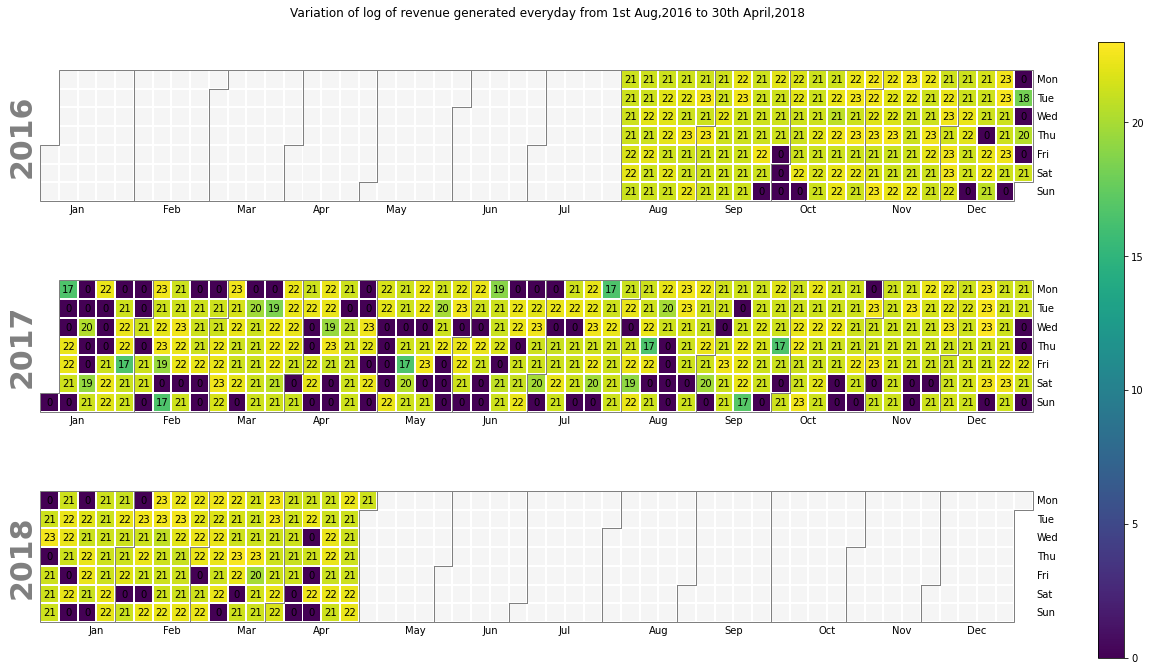

In [ ]:
df = train.groupby(by="date")["totals_transactionRevenue"].sum().apply(np.log1p)
calplot.calplot(df, colorbar=True, figsize=(18,9), textformat="{:.0f}", cmap="viridis",
                suptitle="Variation of log of revenue generated everyday from 1st Aug,2016 to 30th April,2018",)

Zero revenue was generated mostly in earlier months of a year. Not much can be inferred from this plot but it's good to have such kind of visualization which displays data throughout the given time-period.



---



---

---





Now that we have removed a feature that we don't want (totalTransactionRevenue), modified a column (date) for its better use, and also got some basic insights on some pattern by visits and purchases in GStore, let's go ahead and design some new features ✒ <br>
Thanks to [this amazing documentation by pandas](https://pandas-docs.github.io/pandas-docs-travis/reference/series.html#time-series-related) which contains multiple built-in methods for designing time-series features.

Extracting some very basic but important data using the <b>date</b> 📅 column:-
* year (here:2016/2017/2018)
* month (1-12: Jan-Dec)
* day (1-31)
* dayofweek (Mon-0/Tue-1/Wed-2/Thur-3/Fri-4/Sat-5/Sun-6)
* name of the week's day (Mon/Tue/Wed/Thur/Fri/Sat/Sun)<br>
and many more

In [ ]:
def createFeaturesFromDate(df):
  """Takes in a dataframe & returns new features based out of date column"""
  df["year"] = df["date"].dt.year
  df["month"] = df["date"].dt.month
  df["dayOfMonth"] = df["date"].dt.day
  df["dayOfWeek"] = df["date"].dt.dayofweek
  df["dayName"] = df["date"].dt.day_name()
  df["weekOfYear"] = df["date"].dt.isocalendar().week
  df["dayOfYear"] = df["date"].dt.dayofyear
  df["quarter"] = df["date"].dt.quarter
  df["dayOfYear"] = df["date"].dt.dayofyear
  return df
train = createFeaturesFromDate(train)
test = createFeaturesFromDate(test)  

From the line plot & calendar plots above, we can observe that the revenue generation has spiked a lot during the year ends (from around Oct-Dec). It will definitely make sense to design a new feature which will detect whether it is year end or not (based on the date of visit).

In [ ]:
def detectYearEnd(x):
  """Takes in date and detects whether it is year end (Oct-Dec) or not"""
  if x.month in [10,11,12]:
    return "Yes"
  else:
    return "No"
train["isYearEnd"] = train["date"].apply(detectYearEnd)
test["isYearEnd"] = test["date"].apply(detectYearEnd)

Now that we have the days of the week on which visitors logged in, let's design a new feature which will indicate whether the visitor logged in (& bought something) on a weekend or a weekday.<br>
Note: Sat/Sun ➡ 1 (weekend) 🍺 Mon-Fri ➡ 0 (weekdays)

In [ ]:
def check_weekend(x):
  """Takes in a day name and detects whether it is weekend or not"""
  if x in ["Saturday","Sunday"]:
    return "Yes"
  else:
    return "No"
train["is_weekend"] = train["dayName"].apply(check_weekend)    
test["is_weekend"] = test["dayName"].apply(check_weekend)

The visitStartTime feature is the POSIX timestamp at which the user logged in to GStore. Let's convert it into current system format and extract relevant features out of it.

In [ ]:
def getFeaures_fromPOSIXtimestamp(x):
  """Takes time and returns timestamp in current format."""
  return dte.fromtimestamp(x)
def getHr_fromPOSIX(x):
  """Returns hour from timestamp"""
  return x.hour
def getMin_fromPOSIX(x):
  """Returns minute from timestamp"""
  return x.minute
def getSec_fromPOSIX(x):
  """Returns second from timestamp"""
  return x.second
def createFeaturesFromVisitStartTime(df):
  """Returns the dataframe with newly formed features using visitStartTime"""
  whole_timestamp = df["visitStartTime"].apply(getFeaures_fromPOSIXtimestamp)
  df["visit_hr"] = whole_timestamp.apply(getHr_fromPOSIX)
  df["visit_min"] = whole_timestamp.apply(getMin_fromPOSIX)
  df["visit_sec"] = whole_timestamp.apply(getSec_fromPOSIX)
  return df

train = createFeaturesFromVisitStartTime(train)
test = createFeaturesFromVisitStartTime(test)

Now that we have utilized the visitStartTime feature and extracted information from it, it's better to drop it.

In [ ]:
train.drop(columns=["visitStartTime"],axis=1,inplace=True)
test.drop(columns=["visitStartTime"],axis=1,inplace=True)

Designing 2 more features:-
* time_of_day --> midnight/morning/afternoon/evening/night
* is_office_hours

In [ ]:
def return_TimeOfDay(x):
  """Takes in hour of the day and detects time of day (midnight/morning/afternoon/evening/night)"""
  if x<6:
    return "midnight(12am-6am)"
  elif x>=6 and x<12:
    return "morning(6am-12pm)"
  elif x>=12 and x<18:
    return "afternoon_evening(12pm-6pm)"
  else:
    return "night(6pm-12am)"
train["time_of_day"] = train["visit_hr"].apply(return_TimeOfDay)
test["time_of_day"] = test["visit_hr"].apply(return_TimeOfDay)

def detect_office_hours(x):
  """Takes in hour of day; returns 'Yes' if it is office hours (i.e. 9am to 5pm) else returns 'No'"""
  if x>=9 and x<=17:
    return "Yes"
  else:
    return "No"
train["is_office_hours"] = train["visit_hr"].apply(detect_office_hours)
test["is_office_hours"] = test["visit_hr"].apply(detect_office_hours)

In [ ]:
print(train.shape)
print(test.shape)

(1708337, 45)
(401589, 45)


In [ ]:
train.head(2)

,fullVisitorId,channelGrouping,date,visitNumber,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.adNetworkType,value,year,month,dayOfMonth,dayOfWeek,dayName,weekOfYear,dayOfYear,quarter,isYearEnd,is_weekend,visit_hr,visit_min,visit_sec,time_of_day,is_office_hours
0,3162355547410993243,Organic Search,2017-10-16,1,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,OTHERS,OTHERS,OTHERS,OTHERS,1,1.0,1.0,0.0,0.0,0.0,OTHERS,google,organic,water bottle,OTHERS,OTHERS,0.0,OTHERS,EMEA,2017,10,16,0,Monday,42,289,4,Yes,No,0,0,50,midnight(12am-6am),No
1,8934116514970143966,Referral,2017-10-16,6,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,OTHERS,2,2.0,2.0,28.0,0.0,0.0,OTHERS,sites.google.com,referral,OTHERS,/a/google.com/transportation/mtv-services/bike...,OTHERS,0.0,OTHERS,North America,2017,10,16,0,Monday,42,289,4,Yes,No,17,51,47,afternoon_evening(12pm-6pm),Yes


In [ ]:
test.head(2)

,fullVisitorId,channelGrouping,date,visitNumber,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.adNetworkType,value,year,month,dayOfMonth,dayOfWeek,dayName,weekOfYear,dayOfYear,quarter,isYearEnd,is_weekend,visit_hr,visit_min,visit_sec,time_of_day,is_office_hours
0,7460955084541987166,Organic Search,2018-05-11,2,Chrome,Android,True,mobile,Asia,Southern Asia,India,Delhi,OTHERS,OTHERS,OTHERS,4,3.0,1,973.0,0.0,0.0,OTHERS,google,organic,OTHERS,OTHERS,OTHERS,0.0,OTHERS,APAC,2018,5,11,4,Friday,19,131,2,No,No,4,29,1,midnight(12am-6am),No
1,460252456180441002,Direct,2018-05-11,166,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,San Francisco,OTHERS,4,3.0,1,49.0,0.0,0.0,OTHERS,(direct),OTHERS,OTHERS,OTHERS,OTHERS,0.0,OTHERS,North America,2018,5,11,4,Friday,19,131,2,No,No,18,48,3,night(6pm-12am),No


We are now having 15 new time-series based features.<br>
Proceeding with some more EDA.

In [ ]:
print("Total no. of data points in train:",train.shape[0])
print("No. of unique visitors in train:",len(train.fullVisitorId.unique()))
print("Total no. of data points in test:",test.shape[0])
print("No. of unique visitors in test:",len(test.fullVisitorId.unique()))
print("No. of common visitors between train & test:",len( set(test.fullVisitorId.unique()).intersection(train.fullVisitorId.unique()) ))

Total no. of data points in train: 1708337
No. of unique visitors in train: 1323730
Total no. of data points in test: 401589
No. of unique visitors in test: 296530
No. of common visitors between train & test: 2759


<h3><b>Below plot is the PDF of revenue in our train dataset.</b></h3>

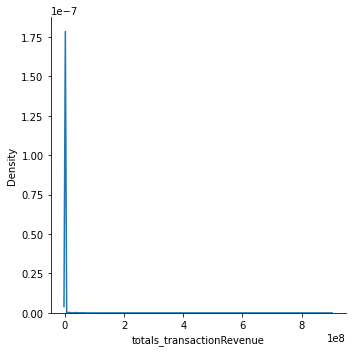

In [ ]:
sns.displot(data=train,x=train['totals_transactionRevenue'],kind="kde")
plt.show()

Observations: It clearly displays the 80-20 rule of Power Law. A very few values (here, zero revenue) dominate a lot compared to others, i.e. the top 20% contain the 80% values. This can also be observed via log-log plot of the above data.<br>
Below is a plot of log of probability that a particular revenue value is found in the dataset VS log of that particular revenue amount. More details on this can be found [here](https://en.wikipedia.org/wiki/Power_law#:~:text=Log%E2%80%93log%20plots%20are%20an%20alternative%20way%20of%20graphically%20examining%20the%20tail%20of%20a%20distribution%20using%20a%20random%20sample).

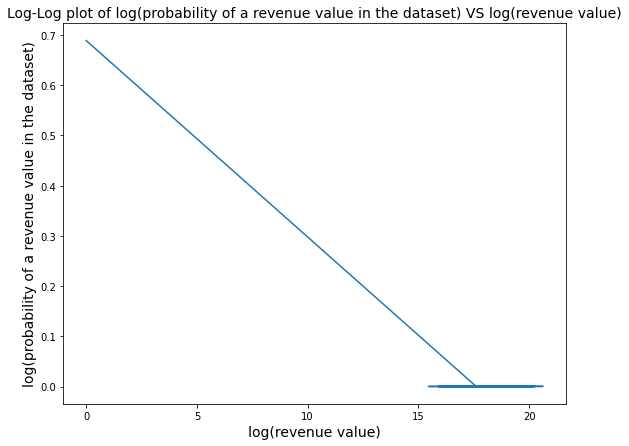

In [ ]:
# https://en.wikipedia.org/wiki/Power_law
prb = [] # list of all log(probability values of revenues)
val = [] # list of log(revenue values)
s = train['totals_transactionRevenue'].value_counts()
for i in s.values:
  prb.append(np.log1p(i/train.shape[0])) # i=count of a revenue value in the dataset, train.shape[0]=total no. of data-points
for j in s.index:
  val.append(np.log1p(j)) # j=revenue value

plt.figure(figsize=(9,7))
plt.title("Log-Log plot of log(probability of a revenue value in the dataset) VS log(revenue value)",fontsize=14)
plt.xlabel("log(revenue value)",fontsize=14)
plt.ylabel("log(probability of a revenue value in the dataset)",fontsize=14)
plt.plot(val,prb)
plt.show()

Conclusion: The points in the plot have converged into a straight line and hence we can finally & surely say that our revenue follows a Power Law dstribution.

<b><h3>Below is a scatter plot of Total Revenue Generated by every visitor to GStore.</h3></b>


Out of 1323730 visitors, only 14403 i.e. 1.0880617648614144 % visitors have generated most revenue.
Rest 1309327 i.e. 98.91193823513859 % visitors have never bought anything.



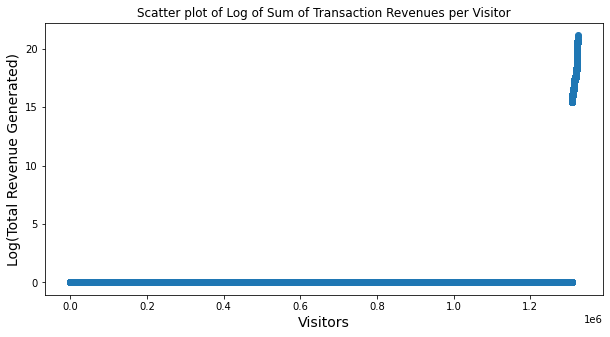

In [ ]:
df = train.groupby(by="fullVisitorId")["totals_transactionRevenue"].sum().apply(np.log1p)
non_zero_revenue = len(df[df>0])
zero_revenue = len(df) - len(df[df>0])
total_visitors = len(df)
print("Out of",total_visitors,"visitors, only",non_zero_revenue,"i.e.",(non_zero_revenue/total_visitors)*100,"% visitors have generated most revenue.")
print("Rest",zero_revenue,"i.e.",(zero_revenue/total_visitors)*100,"% visitors have never bought anything.")
print()

plt.figure(figsize=(10,5))
plt.scatter(range(len(df)), np.sort(df))
plt.title("Scatter plot of Log of Sum of Transaction Revenues per Visitor")
plt.xlabel("Visitors",fontsize=14)
plt.ylabel("Log(Total Revenue Generated)",fontsize=14)
plt.show()

Observations:-
* Maximum visitors have generated no revenue at all. They are that flat line in the plot.
* Only a few visitors have purchased something finally. They are that little patch of point on the top-right. Once again proving that only a few customers help to generate most of the revenue.

<b><h3>Below is a CDF & PDF of non-zero revenues values in the dataset.</h3></b>
Applying log just to bring down the scale.

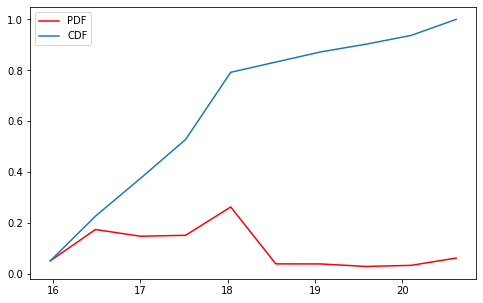

In [ ]:
# https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/

# getting all non-zero revenue values and taking their log (log because the revenues are in a very high range & it brings down the scale to a lower range)
df = train[train['totals_transactionRevenue'] > 0]['totals_transactionRevenue'].apply(np.log)
  
# hist_values=count of each bin, bin_edges=ending edge value of each bin
# no. of bin_edges will be len(hist)+1: to indicate starting edge of the first bin as well
hist_values, bin_edges = np.histogram(df.values,density=True,bins=10)
  
# pdf = PDF of the histogram using hist_values
pdf = hist_values / sum(hist_values)
  
# cdf = cumulative sums of the pdf values; the maximum value will ultimately sum to 1
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.figure(figsize=(8,5))
plt.plot(bin_edges[1:], pdf, color="red", label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.legend()

In [ ]:
print("Observations:-")
print("90% revenue values are less than",np.int(np.exp(20)/1e6),"million approx.")
print("50% revenue values are less than",np.int(np.exp(17.5)/1e6),"million approx.")

Observations:-
90% revenue values are less than 485 million approx.
50% revenue values are less than 39 million approx.


<b><h3>Below is a violin plot of all non-zero revenues in our train dataset. (session-level non-zero revenues)</h3></b>

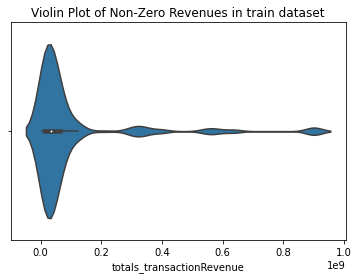

In [ ]:
df = train[train['totals_transactionRevenue'] != 0]
plt.title("Violin Plot of Non-Zero Revenues in train dataset")
sns.violinplot(data=train,x=df['totals_transactionRevenue'])

Observations:-
* Median or 50th percentile revenue is about 50 million.
* Most of the customers have purchased items worth 40-60 million in a session's purchase.
* Very few customers have generated very high revenue (i.e. greater than 200 million). This is what the 80-20 rule says! 💵💲

<b><h3>Below is a scatter plot of Total Revenue Generated by every visitor to GStore (non-zero revenues). These customers have actually bought something. (visitor-level non-zero revenues)</h3></b>


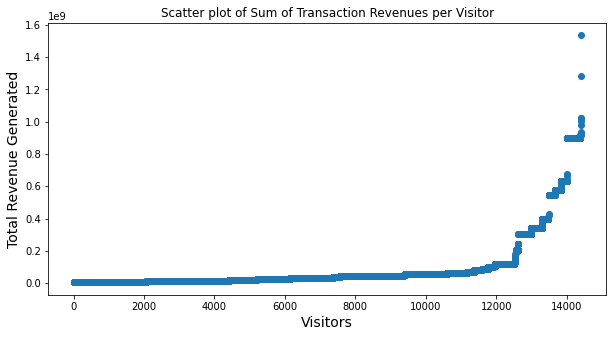

In [ ]:
df = train[train['totals_transactionRevenue'] != 0]
df = df.groupby(by="fullVisitorId")["totals_transactionRevenue"].sum()

plt.figure(figsize=(10,5))
plt.scatter(range(len(df)), np.sort(df))
plt.title("Scatter plot of Sum of Transaction Revenues per Visitor")
plt.xlabel("Visitors",fontsize=14)
plt.ylabel("Total Revenue Generated",fontsize=14)
plt.show()

Observations:-
* Maximum visitors have generated low revenue. They are that almost flat line in the bottom of the plot.
* Only a few visitors have performed costly purchases. They are those little patches of points on the right. Once again proving that only a few customers help to generate most of the revenue.

<h3><b>Let's discuss about the metric we are going to use in this problem</b></h3>


*   Since this is a regression problem, our model will have to predict real values in the long run.
*   We have the transaction revenues as our target variable which ranges from 0 to billions in this case. But we have to perform our prediction on visitor level, i.e. how much revenue will each visitor in the submission_v2.csv file generate in the future.
* Note that we have to take log of sum of revenue generated by each customer, and hence, the problem of any kind of outlier value will get diminished and moreover, this data is designed to handle very high revenues as well. Thus, the concern we are left with is: the extent of incorrect prediction we are going to make while prediction.
* Since this is a problem where marketing teams will be investing millions or even billions for different promotional strategies, it will be better if our model predicts as less incorrect data as possible. As too much incorrect prediction may lead to loss of resources worth millions!
* RMSE is a metric which is great at penalizing errors. It contains a squared error term, which highlights significant errors to the model and in turn helps the model to reduce the error via optimizations. Moreover, due to the square root in the end, the values return in the same scale as that of actual values.
* Conclusion: RMSE will be the best metric to use here.




<h3><b>All the below plots display how does the revenue depend/vary across each type of value of a feature.</b></h3>

In [ ]:
def plot_grouped_bar(group_by_feature,data=train,target="totals_transactionRevenue"):
  """This function takes a feature(group_by_feature) using which we want to examine another feature(target) in a dataset(data)."""

  ser1 = data.groupby(by=group_by_feature)[target].count()
  ser2 = data.groupby(by=group_by_feature)[target].sum()
  temp_df = pd.DataFrame(data={"visitor_count":ser1.values,"total_revenue":ser2.values},index=ser1.index).sort_values(by="total_revenue",ascending=False)
  temp_df.plot(kind="bar",secondary_y="total_revenue",figsize=(15,5),edgecolor="black",linewidth="2",joinstyle="bevel")

<h3><b>Variation of Visitor Counts & Revenue with channelGrouping</b></h3>

                             Variation of Visitor Counts & Revenue(in 100 billion scale) with channelGrouping


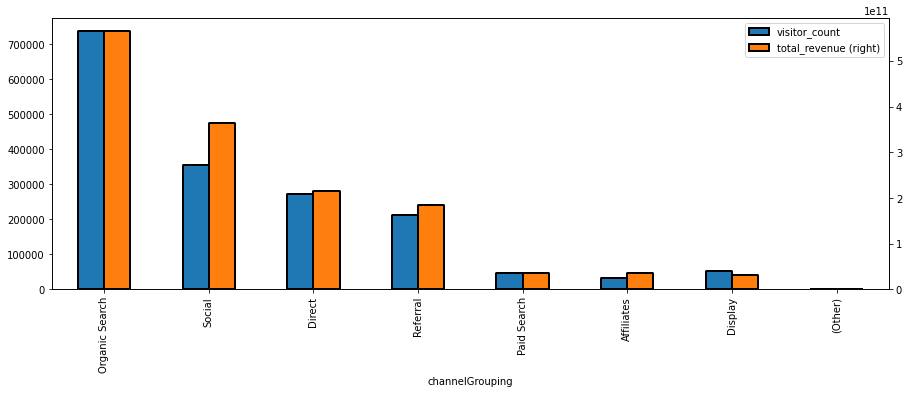

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 100 billion scale) with channelGrouping")
plot_grouped_bar(group_by_feature="channelGrouping")

Observations:-

*   Most of the revenue is generated via Organic Search followed by Social,Direct & Referral.
*   Less visitors have visited via Display ads & Affiliates. It will be good if GStore focuses more on these parts.
* GStore can also focus on Social channel customers since Social media is the key to eveyrthing these days. There's potential in this channel.



<h3><b>Variation of Visitor Counts & Revenue with device_browser</b></h3>

                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with device_browser


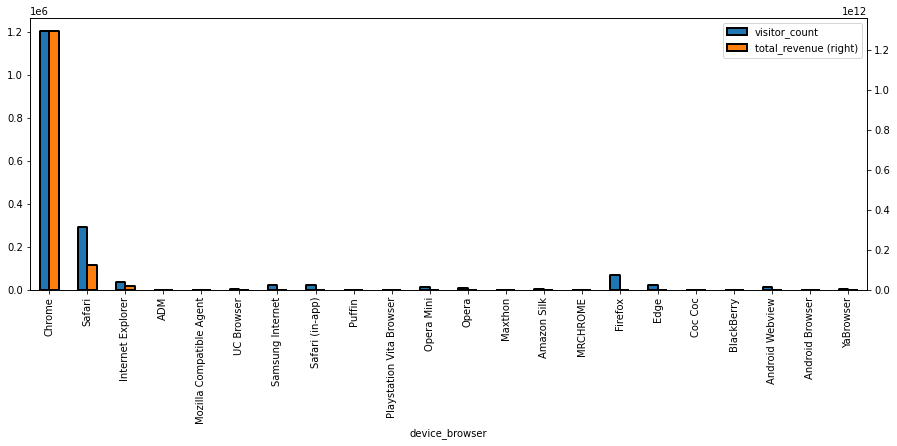

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with device_browser")
plot_grouped_bar(group_by_feature="device_browser")

Observations:-
* Chrome,Safari generate most revenue.
* Internet Explorer,Samasung Internet,Firefox,Edge users visited the store but ended up buying almost nothing.
* GStore can focus more on Chrome & Safari users as the no. of visitors via other browsers is very less.

<h3><b>Variation of Visitor Counts & Revenue with device_operatingSystem</b></h3>

                             Variation of Visitor Counts & Revenue(in 100 billion scale) with device_operatingSystem


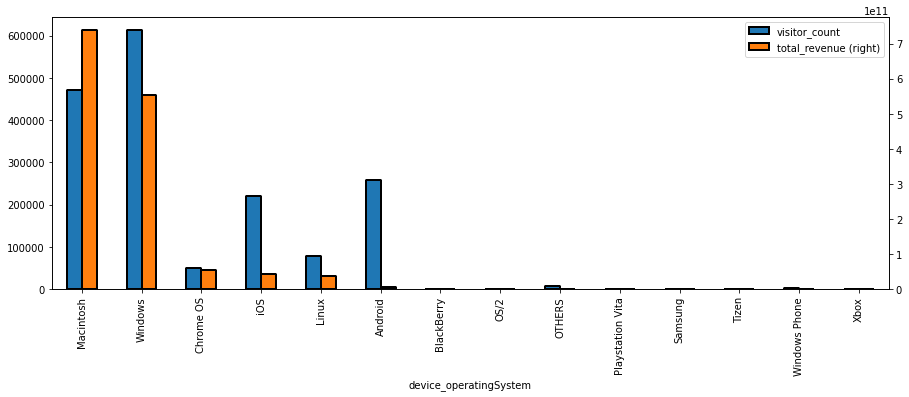

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 100 billion scale) with device_operatingSystem")
plot_grouped_bar(group_by_feature="device_operatingSystem")

Observations:-
* Although Mac has fewer users than Windows, revenue generated via Mac users is far more than via Windows/Chrome OS.
* Revenue generated via iOS is more than Linux or Android (where it's negligble).
* This might be because, comparatively well-off visitors use Mac/iOS and hence, they are the ones who ended up buying.

In [ ]:
# just a numerical conversion of True/False to 1/0:-
def detectMobile(x):
  """Returns 'Yes' if it is mobile, else 'No'"""
  if x==True:
    return "Yes"
  else:
    return "No"
train['device_isMobile'] = train['device_isMobile'].apply(detectMobile)
test['device_isMobile'] = test['device_isMobile'].apply(detectMobile)

<h3><b>Variation of Visitor Counts & Revenue with device_isMobile</b></h3>

                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with device_isMobile


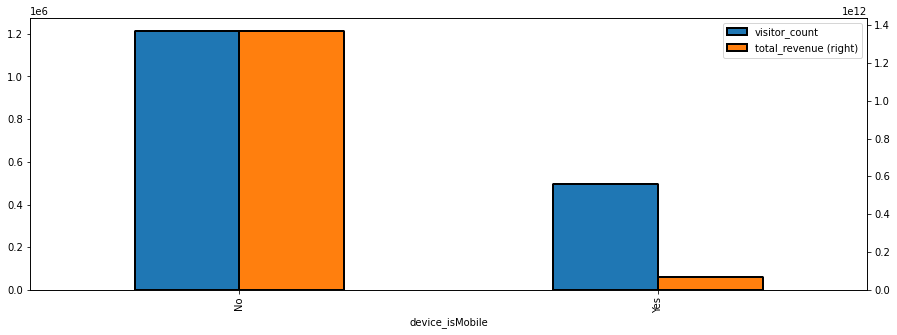

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with device_isMobile")
plot_grouped_bar(group_by_feature="device_isMobile")

Observations:-
* Almost 50% less visitors visit using Mobile.
* Revenue generated via mobile is also very low.

<h3><b>Variation of Visitor Counts & Revenue with device_deviceCategory</b></h3>

                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with device_deviceCategory


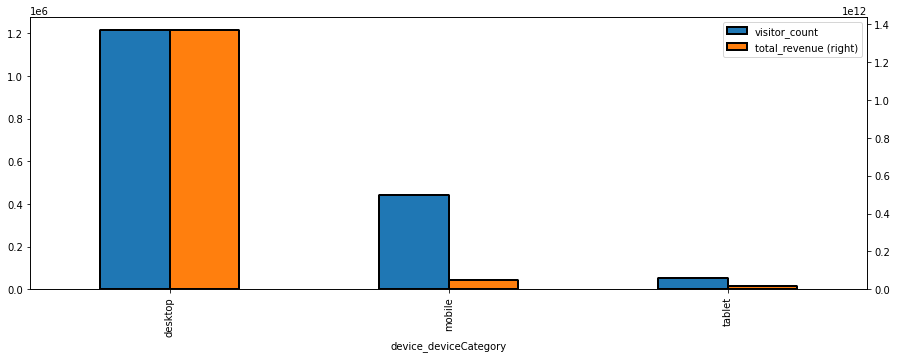

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with device_deviceCategory")
plot_grouped_bar(group_by_feature="device_deviceCategory")

Observations:-
* Almost 50% less visitors visit using Mobile, and almost 90% less via tablet.
* Revenue generated via mobile & tablet is also very low.
* GStore may try to focus on mobile users but not much as the no. of visitors is very low. It's better to invest more on desktop users instead

<h3><b>Variation of Visitor Counts & Revenue with geoNetwork_continent & geoNetwork_subContinent</b></h3>

                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with geoNetwork_continent


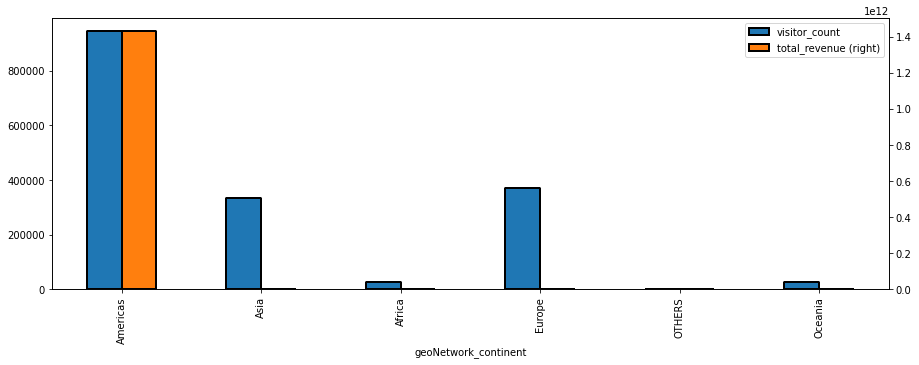

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with geoNetwork_continent")
plot_grouped_bar(group_by_feature="geoNetwork_continent")

                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with geoNetwork_subContinent


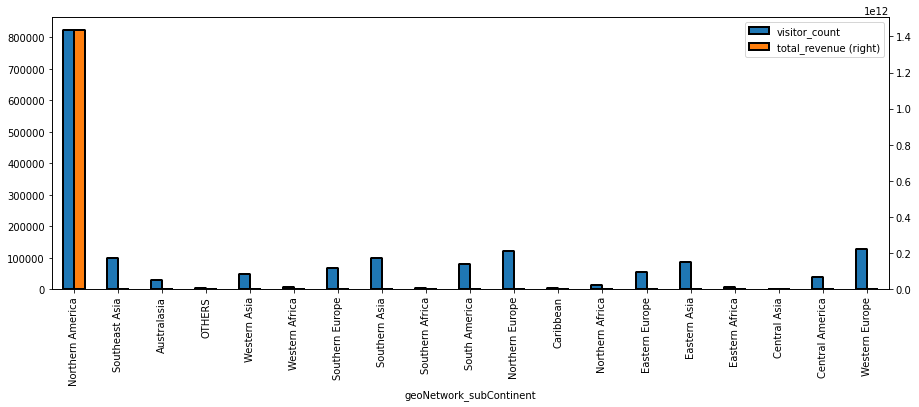

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 1000 billion scale) with geoNetwork_subContinent")
plot_grouped_bar(group_by_feature="geoNetwork_subContinent")

Observations:-
* American visitors are maximum, followed by Asia & Europe.
* But revenue generated via continents other than America is negligible.
* GStore should focus more on the other continents as well. This phenomenon is happening maybe because other continents cannot afford much. So, GStore can try to come up with better & affordable offers for them.

In [ ]:
# Note: all this is session/visit level data

<h3><b>Variation of Visitor Counts & Revenue with year</b></h3>

                             Variation of Visitor Counts & Revenue(in 100 billion scale) with year


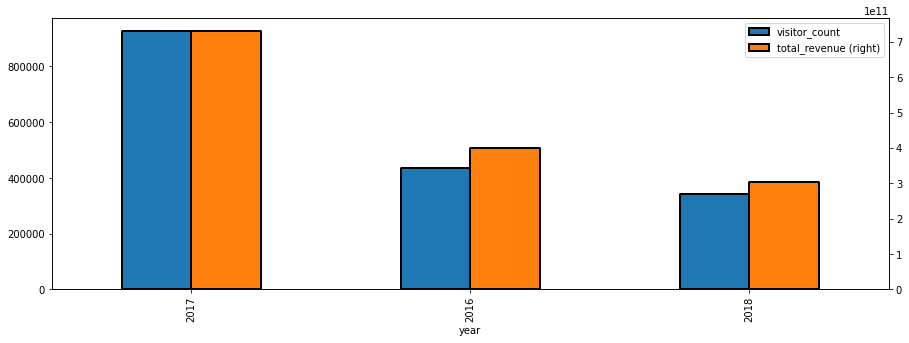

In [ ]:
print("                             Variation of Visitor Counts & Revenue(in 100 billion scale) with year")
plot_grouped_bar(group_by_feature="year")

* 2017 has seen maximum revenue generation as per the data given. As per above plot, 2016 & 2018 have seen lesser revenue because we don't have entire data for these years.
* 1 interesting thing is 2016's data is available for year end and hence dsplays high visitor counts & high revenue as compared to 2018 since 2018's data is available from Jan-April (which usually sees lesser visitors & revenues).

<h3><b>Variation of Visitor Counts & Revenue with days of a week</b></h3>

                       Variation of Visitor Counts & Revenue(in 100 billion scale) with days of a week


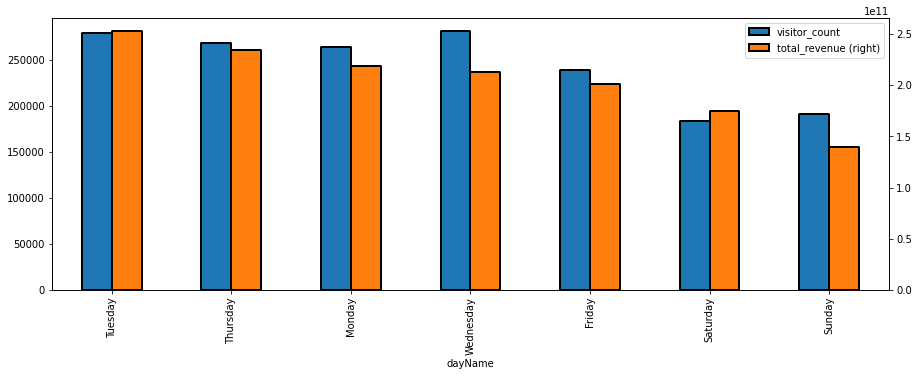

In [ ]:
print("                       Variation of Visitor Counts & Revenue(in 100 billion scale) with days of a week")
plot_grouped_bar(group_by_feature="dayName")

<h3><b>Variation of Visitor Counts & Revenue with weekend vs weekdays</b></h3>

                    Variation of Visitor Counts & Revenue(in 1000 billion scale) with Weekend or Weekdays


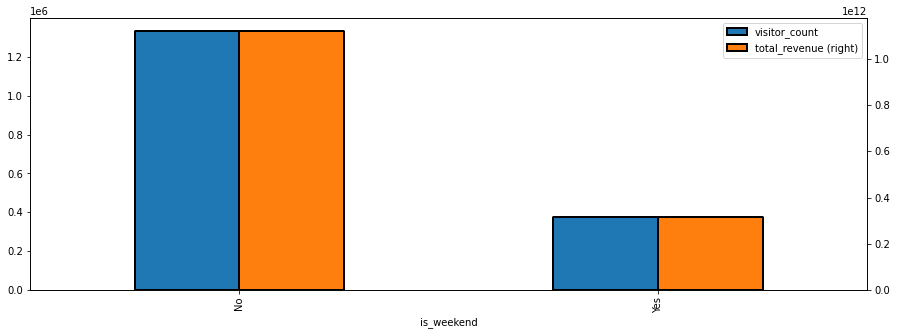

In [ ]:
print("                    Variation of Visitor Counts & Revenue(in 1000 billion scale) with Weekend or Weekdays")
plot_grouped_bar(group_by_feature="is_weekend")

Observations: 
* As is evident from above 2 plots, people prefer to shop mostly on weekdays (as this is an online shopping platform) durng their spare times.
* Not much revenue is generated on weekends as people mostly go out or spend time with their families etc.
* Tuesday has seen maximum revenue.
* GStore can try to give out some kind of deals/offers customized with Weekdays and Weekends separately.

People usually tend to shop online mostly in some spare times of the day. Also, "spare time" varies from person to person. And hence, it would be nice to study this feature.

<h3><b>Variation of Visitor Counts & Revenue with Time of Day</b></h3>

                        Variation of Visitor Counts & Revenue(in 100 billion scale) with Weekend or Weekdays


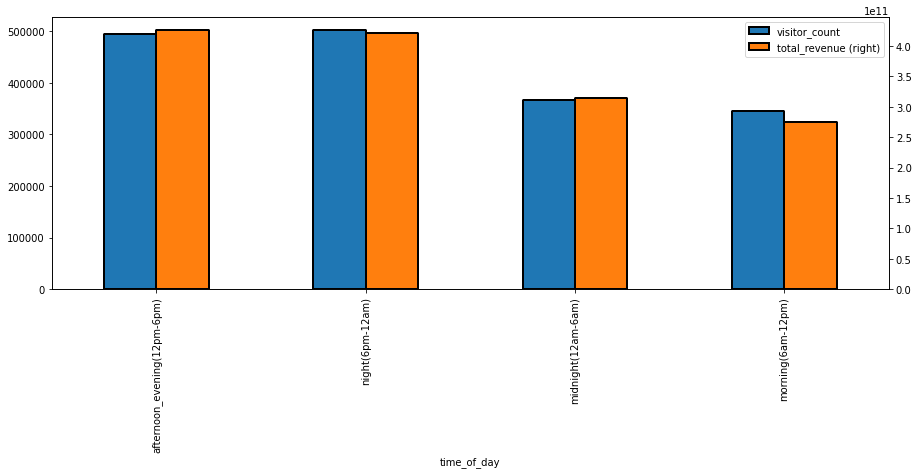

In [ ]:
print("                        Variation of Visitor Counts & Revenue(in 100 billion scale) with Weekend or Weekdays")
plot_grouped_bar(group_by_feature="time_of_day")

Observations:-
People tend to shop more during afternoon/evening hours and less during midnight/morning hours, which is obvious because people sleep or work during these hours.

<h3><b>Variation of Visitor Counts & Revenue with Office hours vs Non-office hours</b></h3>

                       Variation of Visitor Counts & Revenue(in 100 billion scale) with Office Hours or not


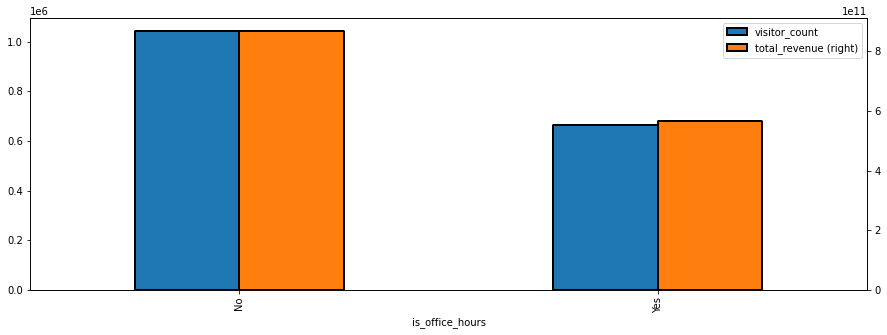

In [ ]:
print("                       Variation of Visitor Counts & Revenue(in 100 billion scale) with Office Hours or not")
plot_grouped_bar(group_by_feature="is_office_hours")

Observations: As is evident from above plot, people visit/buy less during office hours as compared to other times of the day.

<h3><b>Proceeding with some multivariate analysis</b></h3>

<h3><b>Variation of Total no. of hits within a session and revenue w.r.t. mobile vs non-mobile devices</b></h3>

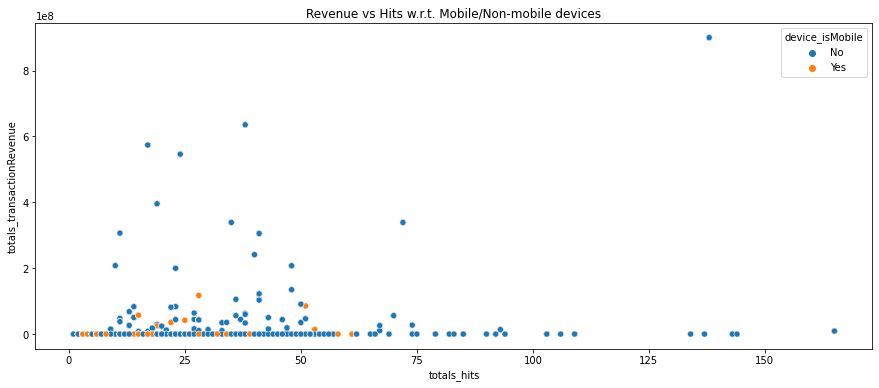

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Revenue vs Hits w.r.t. Mobile/Non-mobile devices")
sns.scatterplot(data=train, x="totals_hits", y="totals_transactionRevenue", hue="device_isMobile")

Observations:-
* Most of the users have purchased after 15-45 hits in a session. This is because people go through entire site in search of better offers/deals over products of various categories, sizes etc. before finally purchasing something.
* Very few mobile users have bought something.

<h3><b>Variation of pageviews and revenue with different times of the day during year end VS non-year end</b></h3>

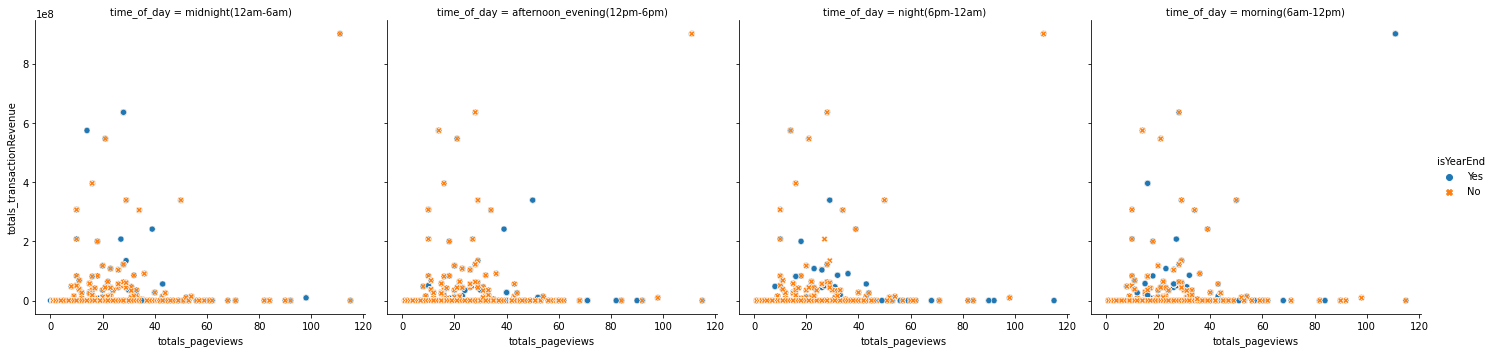

In [ ]:
sns.relplot(data=train, x="totals_pageviews", y="totals_transactionRevenue",
            col="time_of_day", hue="isYearEnd", style="isYearEnd",kind="scatter")

Observations:-
* Year end visitors have bought within 50 page-views in a session mostly.
* Year end visitors have mostly purchased during morning and night times of a day. These customers and times of the day is where GStore should target during year end, in order to receive more sales.

<h3><b>Variation of Revenue & Session Quality Dimension (i.e. indicates how close was a user to performing a transaction) w.r.t. Year End and weekends</b></h3>

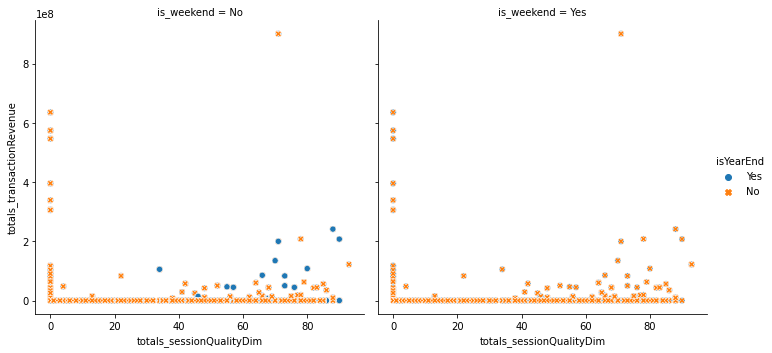

In [ ]:
sns.relplot(
    data=train, x="totals_sessionQualityDim", y="totals_transactionRevenue",
    col="is_weekend", hue="isYearEnd", style="isYearEnd",
    kind="scatter"
)

Observations:-
* Year end visitors and purchasers have bought in weekdays mostly.
* Almost negligible purchases have been done on weekend during year end.
* This is another important insight for GStore. They should focus more during weekdays during year ends. Suitable deals will highly boost revenue! 

<h3><b>Visitor counts across different quarters across different days in a week</b></h3>

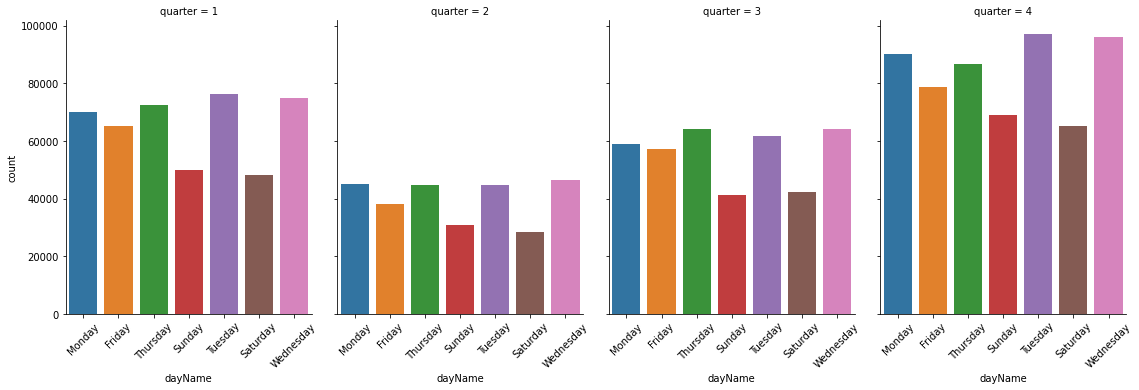

In [ ]:
g = sns.catplot(x="dayName", col="quarter", col_wrap=4, data=train,
                kind="count", height=5, aspect=.8)
g.set_xticklabels(rotation=45)

Observations:-
* In quarter 4 (year end) visitor counts have shot up --> best time for promotional strategies!
* GStore can refer such plots to plan different types of offers across different days of a week.

<h3><b>Below is a Correlation matrix amongst some features in our dataset.</b></h3>

In [ ]:
plt.figure(figsize=(24,12),dpi=480)
correlation = train.corr()
sns.heatmap(correlation,annot=True,cmap="viridis",linewidths=0.5,linecolor="black")

In [ ]:
# # for jupyter notebooks, uncomment this:-
# from IPython.display import Image
# Image(filename="/content/corr-matrix.png")

Observations:-
* <b>totals_transactionRevenue</b> has good correlation with <b>totals_transactions</b>, <b>totals_pageviews</b>, <b>totals_hits</b>, <b>totals_timeOnSite</b>, <b>totals_sessionQualityDim</b>.
* It is quite evident that these features will be helpful in predicting the revenue.
* Also, <b>totals_transactionRevenue</b> is highly negatively correlated with <b>is_weekend</b> which is another evidence that, lesser revenue is generated on weekends.

In [ ]:
# finally reviewing all features:-
train.head(2)

,fullVisitorId,channelGrouping,date,visitNumber,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_referralPath,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.adNetworkType,value,year,month,dayOfMonth,dayOfWeek,dayName,weekOfYear,dayOfYear,quarter,isYearEnd,is_weekend,visit_hr,visit_min,visit_sec,time_of_day,is_office_hours
0,3162355547410993243,Organic Search,2017-10-16,1,Firefox,Windows,No,desktop,Europe,Western Europe,Germany,OTHERS,OTHERS,OTHERS,OTHERS,1,1.0,1.0,0.0,0.0,0.0,OTHERS,google,organic,water bottle,OTHERS,OTHERS,0.0,OTHERS,EMEA,2017,10,16,0,Monday,42,289,4,Yes,No,0,0,50,midnight(12am-6am),No
1,8934116514970143966,Referral,2017-10-16,6,Chrome,Chrome OS,No,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,OTHERS,2,2.0,2.0,28.0,0.0,0.0,OTHERS,sites.google.com,referral,OTHERS,/a/google.com/transportation/mtv-services/bike...,OTHERS,0.0,OTHERS,North America,2017,10,16,0,Monday,42,289,4,Yes,No,17,51,47,afternoon_evening(12pm-6pm),Yes


In [ ]:
# printing the data types of each column:-
print(dict(train.dtypes))

{'fullVisitorId': StringDtype, 'channelGrouping': dtype('O'), 'date': dtype('<M8[ns]'), 'visitNumber': dtype('int64'), 'device_browser': dtype('O'), 'device_operatingSystem': dtype('O'), 'device_isMobile': dtype('O'), 'device_deviceCategory': dtype('O'), 'geoNetwork_continent': dtype('O'), 'geoNetwork_subContinent': dtype('O'), 'geoNetwork_country': dtype('O'), 'geoNetwork_region': dtype('O'), 'geoNetwork_metro': dtype('O'), 'geoNetwork_city': dtype('O'), 'geoNetwork_networkDomain': dtype('O'), 'totals_hits': dtype('int64'), 'totals_pageviews': dtype('float64'), 'totals_sessionQualityDim': dtype('float64'), 'totals_timeOnSite': dtype('float64'), 'totals_transactions': dtype('float64'), 'totals_transactionRevenue': dtype('float64'), 'trafficSource_campaign': dtype('O'), 'trafficSource_source': dtype('O'), 'trafficSource_medium': dtype('O'), 'trafficSource_keyword': dtype('O'), 'trafficSource_referralPath': dtype('O'), 'trafficSource_adContent': dtype('O'), 'trafficSource_adwordsClickInf

In [ ]:
# Let's save the newly featured engineered dataframes:-
train.to_csv("/content/drive/MyDrive/AAIC - Assignments/SNo.23_Self Case Study 1/Output_Files/train_featureEngineered1.csv",index=False)

test.to_csv("/content/drive/MyDrive/AAIC - Assignments/SNo.23_Self Case Study 1/Output_Files/test_featureEngineered1.csv",index=False)